Author: Trần Nguyễn Hoàn Nhi
Assignment 3 - Linear Regression

In [474]:
#Importing necessary library
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

This is a dataset about loan amount for which a customer can request a bank with his/her collateral house.

* Gender: Gender of customer requesting for a loan ('F' or 'M').
* Age: Age of customer requesting for a loan (non-negative values).
* Income (USD): Income of customer requesting for a loan (non-negative values).
* Income Stability: Income stability of customer requesting for a loan ("Low" or "High").
* Property Age: Age of the property (non-negative number of days).
* Property Location: Location of the property ("Rural", "Urban", and "Semi-Urban").
* Property Price: Price of the property (USD).
* Loan Sanction Amount (USD): Ammount of loan the customer can requst for (USD, target value).

In [475]:
# Load and display data
data = pd.read_csv("house_loan_updated.csv")
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.250000,Low,1651.250000,Rural,59641.820000,21026.420753
1,M,29,1989.710000,Low,1990.710000,Urban,179858.510000,60595.183366
2,F,37,1849.910000,Low,1856.910000,Rural,117297.620000,39181.648002
3,M,65,2735.180000,High,2747.180000,Rural,354417.720000,128497.710865
4,F,62,4741.780000,High,4740.780000,Urban,82049.800000,39386.919336


In [476]:
pd.set_option('float_format', '{:f}'.format)

In [477]:
#Showing total number of samples, total number of non-nan values.
#Drop nan-values categorical variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


In [478]:
#Dropping Nan values for categorical values
data.dropna(subset=['Income Stability', 'Property Location'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47282 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47282 non-null  object 
 1   Age                         47282 non-null  int64  
 2   Income (USD)                47253 non-null  float64
 3   Income Stability            47282 non-null  object 
 4   Property Age                47251 non-null  float64
 5   Property Location           47282 non-null  object 
 6   Property Price              47282 non-null  float64
 7   Loan Sanction Amount (USD)  47282 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.2+ MB


In [479]:
#Checking if there is any duplicate
print(data.duplicated().sum())
#No duplicates, sounds good!

0


In [480]:
#Converting categorical values to numerical value, using two method
#For categorical variable which only has two values, the method to be used is Label Encoder.
#For categorical variable which has more than two values, the method should be get_dummies()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cat_cols = [col for col in data.columns if data[col].dtypes == object]
cat_cols.remove('Property Location')
for col in cat_cols: 
    category_encoder = label_encoder.fit_transform(data[col])
    print(label_encoder.classes_)                                       # Fit and transform values in 'Gender' and 'Income Stability'
    data.loc[:, col] = category_encoder                                 # Assign encoded values to replace the original values

['F' 'M']
['High' 'Low']


In [481]:
data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.250000,1,1651.250000,Rural,59641.820000,21026.420753
1,1,29,1989.710000,1,1990.710000,Urban,179858.510000,60595.183366
2,0,37,1849.910000,1,1856.910000,Rural,117297.620000,39181.648002
3,1,65,2735.180000,0,2747.180000,Rural,354417.720000,128497.710865
4,0,62,4741.780000,0,4740.780000,Urban,82049.800000,39386.919336
...,...,...,...,...,...,...,...,...
47292,0,62,2121.480000,1,2135.480000,Rural,240291.630000,78800.491330
47293,1,38,1506.720000,1,1505.720000,Rural,218431.370000,72483.293359
47294,0,20,1595.100000,1,1582.100000,Semi-Urban,154458.880000,52462.861498
47295,0,50,2002.270000,1,2007.270000,Semi-Urban,72277.780000,22909.596763


In [482]:
#For 'Property Location' which takes "Urban", "Rual" and "Semi-urban" as its values, the method will be get_dummies
data=pd.get_dummies(data, columns = ['Property Location'])

In [483]:
#Re-order the columns so that the last column should always be the label of the data
data = data[['Gender', 'Age', 'Income (USD)', 'Income Stability', "Property Age", 'Property Price', 'Property Location_Rural', 'Property Location_Semi-Urban', 'Property Location_Urban', 'Loan Sanction Amount (USD)']]
data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Price,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban,Loan Sanction Amount (USD)
0,0,19,1641.250000,1,1651.250000,59641.820000,1,0,0,21026.420753
1,1,29,1989.710000,1,1990.710000,179858.510000,0,0,1,60595.183366
2,0,37,1849.910000,1,1856.910000,117297.620000,1,0,0,39181.648002
3,1,65,2735.180000,0,2747.180000,354417.720000,1,0,0,128497.710865
4,0,62,4741.780000,0,4740.780000,82049.800000,0,0,1,39386.919336
...,...,...,...,...,...,...,...,...,...,...
47292,0,62,2121.480000,1,2135.480000,240291.630000,1,0,0,78800.491330
47293,1,38,1506.720000,1,1505.720000,218431.370000,1,0,0,72483.293359
47294,0,20,1595.100000,1,1582.100000,154458.880000,0,1,0,52462.861498
47295,0,50,2002.270000,1,2007.270000,72277.780000,0,1,0,22909.596763


<AxesSubplot:>

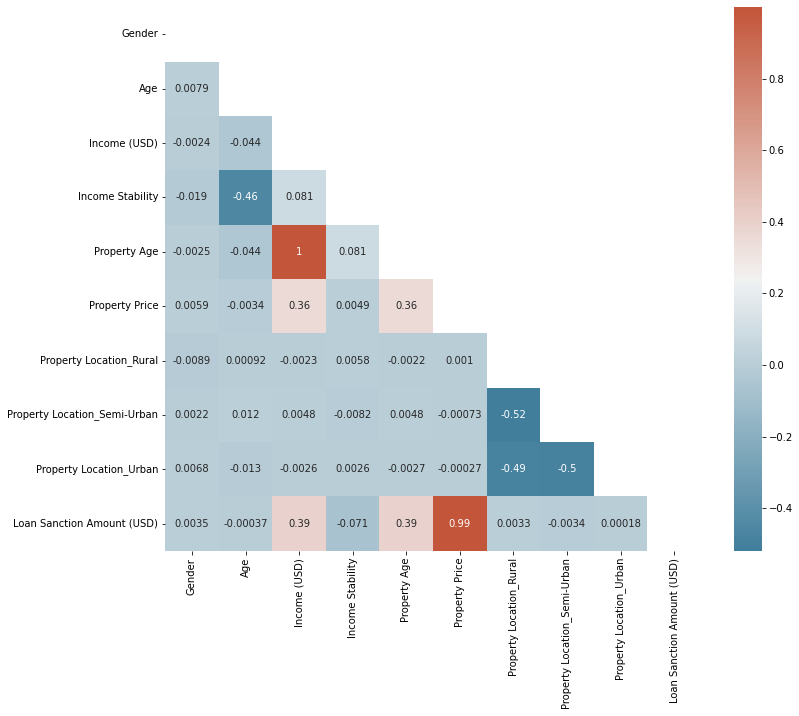

In [484]:
#Drawing correlation heatmap
corr = data.corr()
#
# Set up the matplotlib size
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Hide the upper-triangle values as they are the duplicates of the lower-triangle values
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [485]:
#The correlation between Property Age and Income (USD) is 1. Therefore, one column can be dropped for the simplicity. In this case, income (USD) may be more important, as it is unsual
#for a property to be about 1000s age.
data.drop('Property Age', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income (USD)'}>],
       [<AxesSubplot:title={'center':'Income Stability'}>,
        <AxesSubplot:title={'center':'Property Price'}>,
        <AxesSubplot:title={'center':'Property Location_Rural'}>],
       [<AxesSubplot:title={'center':'Property Location_Semi-Urban'}>,
        <AxesSubplot:title={'center':'Property Location_Urban'}>,
        <AxesSubplot:title={'center':'Loan Sanction Amount (USD)'}>]],
      dtype=object)

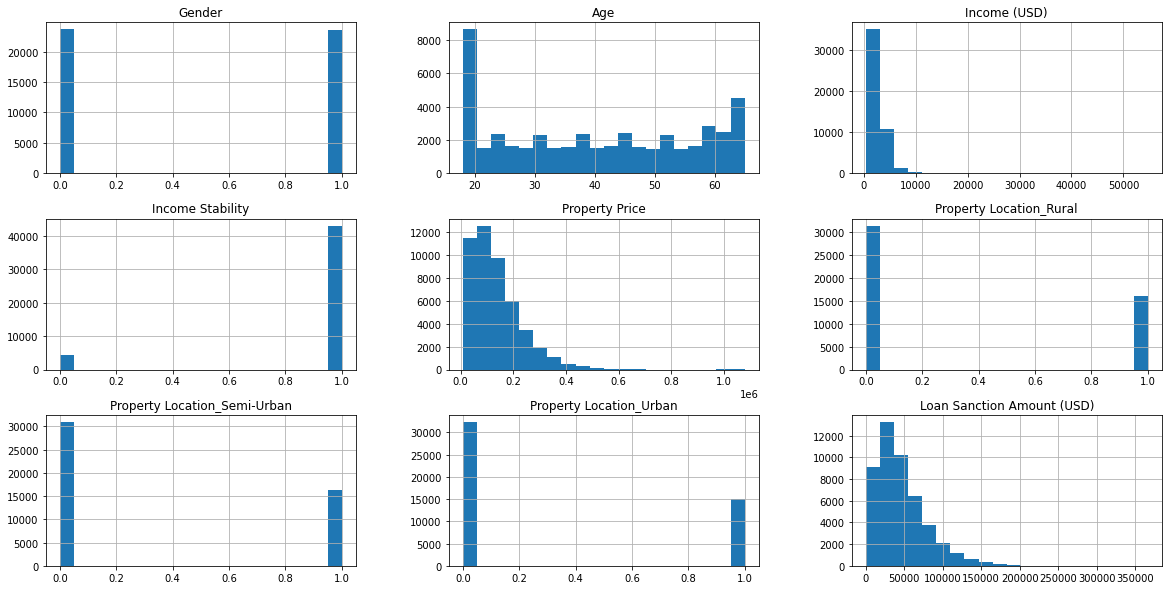

In [486]:
#Creating histogram of each feature to check if they are of normal distribution
data.hist(figsize=(20, 10), bins = 20)

<AxesSubplot:>

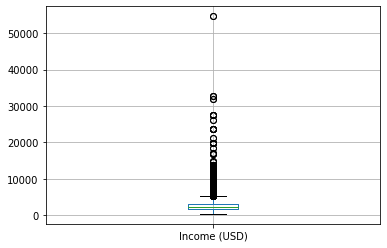

In [487]:
#From the histogram above, it seems that feature 'Income (USD)' has outliers.
data.boxplot(['Income (USD)'])

In [488]:
#Removing outliers by calculting Z-score for each value of the "Income (USD)" column
#Using describe() to see what is the maximum deviation that a data point is away
data["Z_score"] = (data['Income (USD)'] - data['Income (USD)'].mean()) / data['Income (USD)'].std()
data['Z_score'].describe()

count   47253.000000
mean        0.000000
std         1.000000
min        -1.421256
25%        -0.598846
50%        -0.218956
75%         0.348014
max        33.432238
Name: Z_score, dtype: float64

In [489]:
#From my instinct
#Values which are kept are within the range (-1; 5)
data_new = data[(data['Z_score'] < 5) & (data['Z_score'] > -1)]
data_new["Z_score"].describe()

count   44758.000000
mean        0.025057
std         0.822070
min        -0.999927
25%        -0.550578
50%        -0.172123
75%         0.368762
max         4.993642
Name: Z_score, dtype: float64

In [490]:
#Drop 'Z_score' to make it won't affect much the whole data in the training
data_new.drop(columns = ['Z_score'], inplace = True)

C:\Users\thoma\AppData\Local\Temp\ipykernel_20756\2152841586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.drop(columns = ['Z_score'], inplace = True)


In [491]:
# Pre-process data, determine feature x and label y
columns = data_new.columns.tolist()                            # Get column names.
columns.remove('Loan Sanction Amount (USD)')                   # Remove 'Loan Sanction Amount (USD)' (label y column)  
feature_data = data_new[columns]                               # Assign a variable to features x, including all columns except 'Loan Sanction Amount (USD)'
target_data = data_new['Loan Sanction Amount (USD)']           # Assign 'Loan Sanction Amount (USD)' to label y

from sklearn.model_selection import train_test_split
trainX, testX, trainY,testY = train_test_split(feature_data, target_data, train_size=0.70, random_state=2603)

In [492]:
print('Training:' + str(trainX.shape))     # Count data samples in Training set.
print('Test:' + str(testX.shape))          # Count data samples in Test set.
print(trainY.shape)
print(testY.shape)

Training:(31330, 8)
Test:(13428, 8)
(31330,)
(13428,)


In [493]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31330 entries, 38205 to 15405
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        31330 non-null  int32  
 1   Age                           31330 non-null  int64  
 2   Income (USD)                  31330 non-null  float64
 3   Income Stability              31330 non-null  int32  
 4   Property Price                31330 non-null  float64
 5   Property Location_Rural       31330 non-null  uint8  
 6   Property Location_Semi-Urban  31330 non-null  uint8  
 7   Property Location_Urban       31330 non-null  uint8  
dtypes: float64(2), int32(2), int64(1), uint8(3)
memory usage: 1.3 MB


In [494]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13428 entries, 17086 to 14706
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        13428 non-null  int32  
 1   Age                           13428 non-null  int64  
 2   Income (USD)                  13428 non-null  float64
 3   Income Stability              13428 non-null  int32  
 4   Property Price                13428 non-null  float64
 5   Property Location_Rural       13428 non-null  uint8  
 6   Property Location_Semi-Urban  13428 non-null  uint8  
 7   Property Location_Urban       13428 non-null  uint8  
dtypes: float64(2), int32(2), int64(1), uint8(3)
memory usage: 563.9 KB


In [495]:
#Filling missing values in the "Income (USD)" column using Imputer
#Imputer fills the missing values by calculating the mean of the training set and then assign it to both training and testing sets.
#We use fit_transform on the train data to learn the parameters of the scaling on it and at the same time we scale the train data
#We use only transform on the test data to scale it using the learned parameters on the train data
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy = 'mean')

trainX['Income (USD)'] = mean_imputer.fit_transform(trainX["Income (USD)"].to_frame())
testX['Income (USD)'] = mean_imputer.transform(testX["Income (USD)"].to_frame())

In [496]:
#The categorical data need not be standardized. Rather, it is the numerical data that needs it.
#Numerical data is: Age, Income (USD), Property Price
from sklearn.preprocessing import StandardScaler

cols = ['Age', 'Income (USD)', 'Property Price']
stdz = StandardScaler()

trainX[cols] = stdz.fit_transform(trainX[cols])
testX[cols] = stdz.transform(testX[cols])

In [497]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 

model.fit(trainX,trainY)

from sklearn.metrics import mean_absolute_error

pred = model.predict(testX)                                              # Make prediction on the whole Test set.
mean_absolute_error(y_pred=pred, y_true=testY)                           # Calculate mean absolute error to observe the performance of the learned model based on the predictions and the labels.

138.78745766343263